# TX00DH43-3002 Exercises session 1: Working with NumPy and Matplotlib

## Niko Holopainen 1805828 ICT18-M

## Observations

#### What did you learn? List 2-3 points.
Bit of math functions from Python & Numpy

Jupyter starters (never used it)

Math refresh on various subjects

#### What was difficult? List 2-3 points and try to be specific.
The math needed to do these, I'm really bad at math (plotting, matrixes etc)

Numpy library documentation was a bit hard to find needed stuff


#### Import needed packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### Before you start

Take a brief look at numpy tutorial at https://numpy.org/doc/stable/user/quickstart.html. You don't need to memorize details, just try to get an overview. Use about 15mins or less for this.

#### Solving the exercises

In the cells containing code, you'll see comment marks (#'s) in places where you might want to write code. Please note that for some of the exercises we do, there is a ready-made implementation in some packages - the purpose here, however, is to practice working with numpy. In the notebook we are not defining Python functions even though it would make sense - if you know Python or want to experiment please feel free to define your own functions.

## 1 Create NumPy array

Create a numpy array that contains numbers from -10 to +10 at 1 unit intervals. Use two alternative numpy functions: arange() and linspace() - assign the array you create with arange() to x, and the one you create with linspace() to x2. Check their documentation at numpy.org. Print out the shape of the array, it will tell you how many elements the array has. Also print out the array to see it has correct data. (The prints are already included in the code). The code in the cell has assert statement(s) that check that the answers are correct.

About array shapes: a one-dimensional array of N elements has shape (N,), whereas an array with N rows and one column has shape (N,1). 

In [16]:
x = np.arange(-10, 11, 1)
print(x.shape)
print(x)
assert(x.shape[0] == 21)
assert(x[0] == -10)
assert(x[10] == 0)
assert(x[20] == 10)

N = 21
x2 = np.linspace(-10, 10, N)
print(x2.shape)
print(x2)
assert(x2.shape[0] == 21)
assert(x2[0] == -10)
assert(x2[10] == 0)
assert(x2[20] == 10)

(21,)
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
(21,)
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


## 2 Multiply two numpy arrays

All arithmetic operations in numpy are performed element-wise, ie. if two numpy arrays (of compatible sizes) are added, the resulting array has elements that are sums of elements in the two arrays. Create a new numpy array y by multiplying the array x you created in the previous step with itself - so the resulting array will have squares of the original elements in it.

In [21]:
y = np.multiply(x, x)

print(y.shape)
print(y)

assert(y.shape[0] == 21)
assert(y[0] == 100)
assert(y[1] == 81)
assert(y[10] == 0)
assert(y[20] == 100)

(21,)
[100  81  64  49  36  25  16   9   4   1   0   1   4   9  16  25  36  49
  64  81 100]


## 3 Plot

Let's plot the array y versus the array x, ie. create a plot where on x axis we have x values, and on y axis y values.

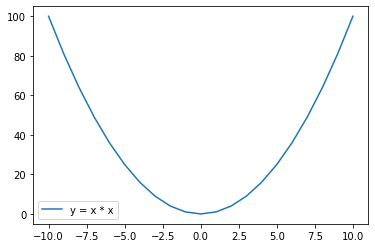

In [26]:
plt.plot(x, y, label="y = x * x")
plt.legend()
plt.show()

## 4 Plot sin wave

We'll create an array x with 200 values in interval -10, 10. (200 is high enough to make the plot look smooth). Numpy has a function sin() to compute sin function of a numpy array. Use it to create array y and then plot x and y.

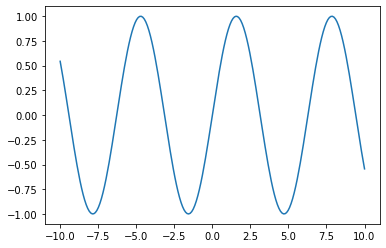

In [33]:
N = 200
x = np.linspace(-10, 10, N)
y = np.sin(x)

plt.plot(x, y)
plt.show()

## 5 Plot function y = x * sin(x)

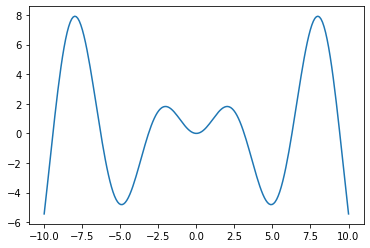

In [35]:
N = 200
x = np.linspace(-10, 10, N)
y = x * np.sin(x)

plt.plot(x, y)
plt.show()

## 6 Time series

A time series can be defined by splitting it up to baseline, trend, and seasonality. Define these components so that the baseline is 10, the growth is 0.1 per each time step and there is 1 year sin seasonality with amplitude 10. Plot the series.

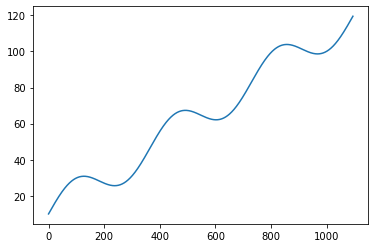

In [67]:
N = 1096
t = np.linspace(0, 3*365, N)

base = 10
trend = t / 10
seasonality = 10 * np.sin(t * 2 * math.pi / 365)

plt.plot(t, base + trend + seasonality)
plt.show()

## 7 Add noise

Add normal distributed noise to the time series. Define a noise array that contains noise centered at 0 with standard deviation 3 and create a time series with all elements: baseline, trand, seasonality and noise. Plot the series.

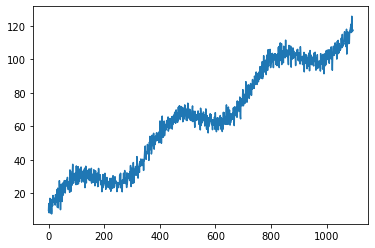

In [68]:
noise = np.random.normal(0, 3, N)

assert(noise.shape[0] == N)

y = base + trend + seasonality + noise
plt.plot(t, y)
plt.show()

## 8 Create numpy arrays from Python lists

Use numpy function array() to create numpy arrays x and y from lists heights and weights. Plot the observations as dots (plot() function has an extra argument for the format, use 'o').

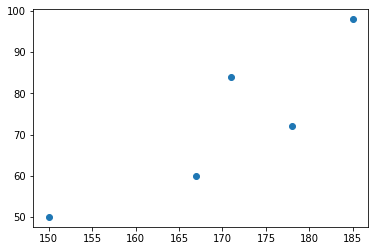

In [71]:
heights = [150, 167, 171, 178, 185]
weights = [50, 60, 84, 72, 98]

x = np.array(heights)
y = np.array(weights)

assert(x.shape[0] == 5 and y.shape[0] == 5)

plt.plot(x, y, "o")
plt.show()

## 9 Linear regression solution

We want to fit a straight line to the data set. The equation of the straight line will our model. It will have two parameters (intercept value, or the constant of the straight line equation, and multiplier, or the slope of the line). In this case an analytical solution is possible, but in general the model fitting is implemented with iterative algorithms.

### Analytical solution

Regression line coefficients (here vector $w$) are given by:

$$
w = (X^TX)^{-1}X^Ty
$$

where $X$ is the design matrix composed of independent variable values $x^{(i)}$:

$
X = \begin{pmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
\ldots \\
1 & x^{(m)}
\end{pmatrix}
$

and $y$ the dependent variable values $y^{(i)}$:

$
y = \begin{pmatrix}
y^{(1)} \\
y^{(2)} \\
\ldots \\
y^{(m)}
\end{pmatrix}
$

where $m$ is the number of samples.

(See for example https://en.wikipedia.org/wiki/Linear_regression#Least-squares_estimation_and_related_techniques for how the solution is derived).

## 10 Create design matrix

We have the observations $x^{(i)}$ in the numpy array x, and to create the design matrix we'll need an array of the same shape as x, but filled with 1s. Use numpy function ones() or ones_like() to create that.

Next we need to stack our ones array and x array together. This can be done in many ways, numpy function column_stack() is one nice way. Assign your design matrix to variale X.

We'll also need arrange the y array so that its shape is (m, 1) (m is 5 in this case). use y.reshape(-1,1) and assign the result to variable yvec. Check that design matrix X and yvec look like the ones in section "Analytical solution".

In [72]:
ones = np.ones(x.shape)
print(ones)
assert(ones.shape == x.shape)
assert(np.sum(ones) == x.shape[0])

X = np.column_stack((ones, x))
print(X.shape)
print(X)

yvec = y.reshape(-1 ,1)
print(yvec.shape)
print(yvec)

[1. 1. 1. 1. 1.]
(5, 2)
[[  1. 150.]
 [  1. 167.]
 [  1. 171.]
 [  1. 178.]
 [  1. 185.]]
(5, 1)
[[50]
 [60]
 [84]
 [72]
 [98]]


## 11 Transpose and matrix multiplication

Transpose of a matrix means that its columns become rows and rows columns:

In [73]:
a = np.array([[1,2,3], [4,5,6]])
print(a)
print(a.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


Multiplying two matrices is different than multiplying the elements (the way multiplication is done in numpy normally). Check https://www.mathsisfun.com/algebra/matrix-multiplying.html for a refresher on matrix multiplication.

In [ ]:
b = np.array([[7,8],[9,10],[11,12]])
print(b)
print(np.matmul(a,b))
print(a @ b)

Now let's do the multiplication of X transpose with X and assign the result to term1:

In [75]:
term1 = np.matmul(X.T, X)
assert(term1.shape == (2,2))
assert(term1[0,1] == 851)

## 12 Matrix inversion

With matrix multiplication the neutral element is identity matrix, a matrix with ones in diagonal and zeros elsewhere. In numpy this kind of matrices can be nicely created with eye() function.

A matrix B is said to be inverse of a matrix A if A multiplied by B is equal to B multiplied by A which is equal to identity matrix. Matrix inversion is used for example when solving groups of linear equations. Inverting a matrix is rather costly operation: its time complexity is $O(n^3)$ where $n$ is the number of elements. Numpy has function inv in linalg package for matrix inversion.

In [76]:
a = np.array([[3,0,3],[2,0,-2],[0,1,1]])
ident = np.eye(a.shape[0])
print(ident)
print(a @ ident)
print(ident @ a)

ainv = np.linalg.inv(a)
print(ainv)
print(a @ ainv)
print(ainv @ a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 3.  0.  3.]
 [ 2.  0. -2.]
 [ 0.  1.  1.]]
[[ 3.  0.  3.]
 [ 2.  0. -2.]
 [ 0.  1.  1.]]
[[ 0.16666667  0.25        0.        ]
 [-0.16666667  0.25        1.        ]
 [ 0.16666667 -0.25       -0.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


To proceed with solving the linear regression problem, let's now invert the term1 matrix we calculated earlier and assign the result to term2. Let's also verify that term2 is really an inverse of term1 by multiplying the two matrices and printing out the result.

In [77]:
term2 = np.linalg.inv(term1)
print(term1 @ term2)

[[1.00000000e+00 2.22044605e-16]
 [0.00000000e+00 1.00000000e+00]]


## 13 Calculate the weight vector w

Now it is time to take the last step in computing $w$ for the linear regression case. Multiply term2 and transpose of X and assign the result to term3. Then multiply term3 with yvec and assign the result to w.

You also try out writing the whole matrix computation as one expression.

In [78]:
term3 = term2 @ X.T
w = term3 @ yvec
print(w.shape)
print(w)

winonestep = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),yvec)
print(winonestep.shape)
print(winonestep)

(2, 1)
[[-140.85117344]
 [   1.25529479]]
(2, 1)
[[-140.85117344]
 [   1.25529479]]


## 14 Plot the model

Let's next plot the data points and model we just created. Data points are plotted like before, and plot for the model line can be added to the same diagram by just putting in more plt.plot() calls (before plt.plot() call).

To plot the model it is handy to first define a range of x values and then compute the model values for each of the x values. 

Assign to xs a range of x values from 140 to 210. Count of values does not matter much since our model is a straight line - two points are enough for that. To calculate the corresponding y values, to be assigned to variable xs, we need to use the model. The model was $y = w_0 + w_1x$ and now w values are available in the w vector (at indices 0 and 1) we computed earlier.

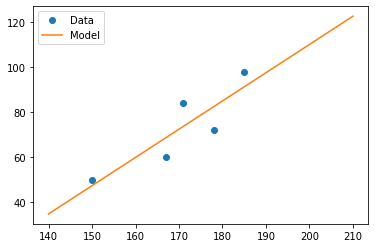

In [82]:
xs = np.linspace(140, 210)
ys = w[0] + w[1] * xs

plt.plot(x, y, "o", label="Data")
plt.plot(xs, ys, label="Model")
plt.legend()
plt.show()

## 15 Compute Mean Squared Error

To compute MSE one needs to compute the errors (true value - predicted value), square them, and then compute the mean of the squares.

In [86]:
errs = y.T - (w[0] + w[1] * x)
print(errs.shape)
print(errs)

mse = np.mean(np.power(errs, 2))
print(mse) # this should be about 68.7

(5,)
[  2.55695478  -8.78305667  10.19576417 -10.59129937   6.62163709]
68.73108185460794


Let's change the weights a bit and then compute mse again. The result should be higher, since the weights computed with the matrix equation should be the ones that minimise the cost function (which is mse).

In [88]:
w1 = w + 0.0005

errs = y.T - (w1[0] + w1[1] * x)
mse = np.mean(np.power(errs, 2))
print(mse) # this should be about 68.7

68.73844415460772


## 16 Design matrix with 2nd order terms

To fit a 2nd degree polynomial, the design matrix is augmented with $x^2$ terms. This can be done by adding to original design matrix np.power(x,2) terms with numpy column_stack() function. Assign the new design matrix to variable X2.

In [90]:
X2 = np.column_stack((X, np.power(x, 2)))
assert(X2.shape[0] == 5 and X2.shape[1] == 3)
print(X2)

[[1.0000e+00 1.5000e+02 2.2500e+04]
 [1.0000e+00 1.6700e+02 2.7889e+04]
 [1.0000e+00 1.7100e+02 2.9241e+04]
 [1.0000e+00 1.7800e+02 3.1684e+04]
 [1.0000e+00 1.8500e+02 3.4225e+04]]


Next step is to compute $w$ vector in the same way as before. Assign the result to w2. 

In [92]:
w2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X2.T,X2)),X2.T),yvec)
assert(w2.shape[0] == 3)
print(w2)

[[ 3.97738236e+02]
 [-5.23226674e+00]
 [ 1.94309966e-02]]


## 17 Plot 2nd order polynomial model

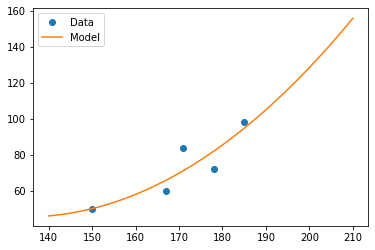

In [93]:
xs = np.linspace(140, 210)
ys = w2[0] + w2[1] * xs + w2[2] * np.power(xs, 2)

plt.plot(x,y,"o",label="Data")
plt.plot(xs, ys, label="Model")
plt.legend()
plt.show()

## 18 Add more samples

Let's add some more samples to our data set (in variables x and y). Numpy arrays can be concatenated with numpy concatenate(). Pay attention to how the arrays to be concatenated are specified in the call.

In [94]:
morex = np.array([166,159,198,184,201,171])
morey = np.array([68,52,81,102,93,71])

newx = np.concatenate((x, morex), axis=0)
newy = np.concatenate((y, morey))

print(newx.shape)
print(newx)

assert(newx.shape[0] == 11 and newy.shape[0] == 11)

(11,)
[150 167 171 178 185 166 159 198 184 201 171]


## 19 Shuffle data before train/test split

To later split the data set into training and test sets we'll first shuffle the data set to get random split, resulting in random training and test sets.

We'll first generate an array with indices,  ie. for and array with N elements, the index array contains values 0..N-1. In second step numpy advanced indexing is used - it allows to use the index array to get a new array of the data in the order of the indices.

Let's first see an example:

In [95]:
a = np.array([11,12,13,14,15])
index_a = np.arange(a.shape[0])
print(index_a)
np.random.shuffle(index_a)
print(index_a)
shuffled_a = a[index_a]
print(shuffled_a)

[0 1 2 3 4]
[0 4 1 3 2]
[11 15 12 14 13]


... and now shuffle newx and newy. Assign the shuffled data to variables x1 and y1.

In [96]:
random_index = np.arange(newx.shape[0])
np.random.shuffle(random_index)

x1 = newx[random_index]
y1 = newy[random_index]

## 20 Split into train/test

We can use numpy slicing to create the training and test sets. See https://numpy.org/doc/stable/user/quickstart.html#indexing-slicing-and-iterating for some examples of slicing. Assign the training data to train_x and train_y, and test data to test_x and test_y.

In [97]:
train_N = 7

train_x = x1[:train_N]
test_x = x1[train_N:]

train_y = y1[:train_N]
test_y = y1[train_N:]

print(train_x)
print(test_x)

assert(train_x.shape[0] == train_N)
assert(test_x.shape[0] == (x1.shape[0] - train_N))

[171 184 167 198 171 178 159]
[150 201 185 166]


## 21 Plot train/test sets

Plot the two data sets using format 'xo' with 'x' replaced with colour id, for example 'r' for red.

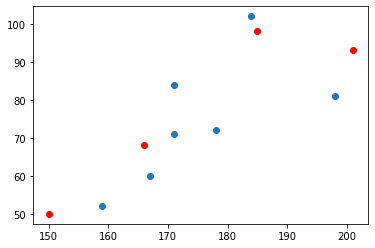

In [98]:
plt.plot(train_x, train_y, "o")
plt.plot(test_x, test_y, "ro")
plt.show()

## 22 Create model based on training data

Create a 2nd degree polynomial model based on the training data and plot that together with the data points.

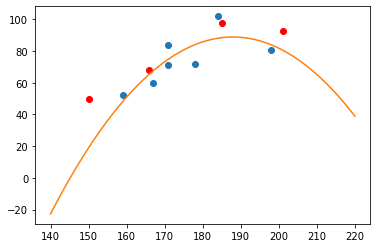

In [100]:
X = np.column_stack((np.ones(train_x.shape), train_x, np.power(train_x, 2)))

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T), train_y.reshape(-1, 1))

plt.plot(train_x, train_y, "o")
plt.plot(test_x, test_y, "ro")
xs = np.linspace(140,220,50)
ys = w[0] + w[1] * xs + w[2] * np.power(xs, 2)
plt.plot(xs,ys)
plt.plot()
plt.show()

## 23 Compute MSE for training and test sets

Compute mse for training and test sets separately.

In [101]:
train_errs = train_y.T - (w[0] + w[1]*train_x + w[2] * np.power(train_x, 2))
train_mse = np.mean(np.power(train_errs, 2))

test_errs = test_y.T - (w[0] + w[1]*test_x + w[2] * np.power(test_x, 2))
test_mse = np.mean(np.power(test_errs, 2))

print("Training mse", train_mse)
print("Test mse", test_mse)

Training mse 73.81979193590101
Test mse 303.2397152559278
